# Use multiple regression model to predict Civilization VI's active days


## Author: Mia (Yuhsin) Hou

# Purpose of this analysis 

##  - Determine the causes of active days
##  - Use multiple regression model to predict players' active day

# Contents

## 1. Understanding of data

## 2. Data preprocessing

## 3. Feature engineering

## 4. Check for linear regression assumption

## 5. Linear regression model performance assessment (R squared score and p-value) 

## 6. Regularization methods

## 7. Conclusion

# Import necessary packages

In [6]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from scipy import stats
from pylab import rcParams

rcParams['figure.figsize'] = (20, 8)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
import datetime as dt
from sklearn.datasets.samples_generator import make_regression
from sklearn.linear_model import Ridge, RidgeCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Part 1 - Understanding of data

## Load data

In [7]:
# Read data
game = pd.read_excel('/Users/miaaa/Desktop/ALY 6050 Enterprise analytics/w3/civ6_players _1_.xlsx')
game

,PLAYERID,INSTALLDATE,ACTIVEDAYS,LASTACTIVEDAY,LEADERMOSTSELECTED,CIVILIZATIONMOSTSELECTED,POLAND,NUBIA,KHMER_AND_INDONESIA,GATHERING_STORM,PERSIA_AND_MACEDON,VIKINGS,RISE_AND_FALL,AUSTRALIA
0,3316379,2018-01-05,1,2018-01-05,LEADER_GILGAMESH,CIVILIZATION_SUMERIA,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,3316386,2018-01-05,3,2018-01-09,LEADER_TRAJAN,CIVILIZATION_ROME,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3316394,2018-01-05,115,2018-07-08,LEADER_T_ROOSEVELT,CIVILIZATION_AMERICA,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,3888460,2018-03-04,112,2019-10-05,LEADER_HOJO,CIVILIZATION_JAPAN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,3940600,2018-03-12,1,2018-03-12,LEADER_PALA,CIVILIZATION_PALA,NaT,NaT,2018-03-12,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2969114,2017-11-12,11,2019-06-06,LEADER_CLEOPATRA,CIVILIZATION_EGYPT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499996,2945770,2017-11-04,2,2018-02-05,LEADER_BARBAROSSA,CIVILIZATION_GERMANY,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499997,2945778,2017-11-04,4,2017-11-11,LEADER_QIN,CIVILIZATION_CHINA,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499998,3309420,2018-01-04,6,2018-01-11,LEADER_VICTORIA,CIVILIZATION_ENGLAND,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [8]:
game.dtypes

PLAYERID                             int64
INSTALLDATE                 datetime64[ns]
ACTIVEDAYS                           int64
LASTACTIVEDAY               datetime64[ns]
LEADERMOSTSELECTED                  object
CIVILIZATIONMOSTSELECTED            object
POLAND                      datetime64[ns]
NUBIA                       datetime64[ns]
KHMER_AND_INDONESIA         datetime64[ns]
GATHERING_STORM             datetime64[ns]
PERSIA_AND_MACEDON          datetime64[ns]
VIKINGS                     datetime64[ns]
RISE_AND_FALL               datetime64[ns]
AUSTRALIA                   datetime64[ns]
dtype: object

In [9]:
list(game)

['PLAYERID',
 'INSTALLDATE',
 'ACTIVEDAYS',
 'LASTACTIVEDAY',
 'LEADERMOSTSELECTED',
 'CIVILIZATIONMOSTSELECTED',
 'POLAND',
 'NUBIA',
 'KHMER_AND_INDONESIA',
 'GATHERING_STORM',
 'PERSIA_AND_MACEDON',
 'VIKINGS',
 'RISE_AND_FALL',
 'AUSTRALIA']

## Feature definition

- PLAYERID: Unique identifier of each player.
- INSTALLDATE: Player's CIV6 install date.
- ACTIVEDAYS: The number of unique days player played the game.
- LASTACTIVEDAY: Last active day of the player.
- LEADERMOSTSELECTED: Most selected leaders in the game.
- CIVILIZATIONMOSTSELECTED: Most selected civilization in the game.
- POLAND: Player's install date of this DLC.
- NUBIA: Player's install date of this DLC.
- KHMER_AND_INDONESIA: Player's install date of this DLC.
- GATHERING_STORM: Player's install date of this expansion pack.
- PERSIA_AND_MACEDON: Player's install date of this DLC.
- VIKINGS: Player's install date of this DLC.
- RISE_AND_FALL: Player's install date of this expansion pack.
- AUSTRALIA: Player's install date of this DLC.

## Target variable - activedays

In [10]:
game[['ACTIVEDAYS']].describe().round(2)

,ACTIVEDAYS
count,500000.00
mean,23.59
std,49.39
min,1.00
25%,3.00
50%,8.00
75%,22.00
max,1081.00


## Observations

- The median activedays is 8, quite below the mean of 23.59 days, indicates it's a positively skewed distribution. 
- The min activeday is only 1, while the max active days has 1,081 days. 
- The standard deviation is 49.3, which is quite high. There must be some factors that can influence the payers' active day.

# Part 2 - Data preprocessing 

## Drop the columns that are not germane to the analysis

Since 'PLAYERID' is just the identification number of each player, I will drop it.

In [11]:
game.drop(['PLAYERID'], axis =1, inplace = True)

## Dealing with null values

In [12]:
# Print the null values.
game.apply(lambda x: sum(x.isnull()), axis = 0)

INSTALLDATE                      0
ACTIVEDAYS                       0
LASTACTIVEDAY                    0
LEADERMOSTSELECTED               0
CIVILIZATIONMOSTSELECTED         0
POLAND                      455335
NUBIA                       470615
KHMER_AND_INDONESIA         473322
GATHERING_STORM             431516
PERSIA_AND_MACEDON          439159
VIKINGS                     481330
RISE_AND_FALL               389261
AUSTRALIA                   478922
dtype: int64

# Part 3 - Feature engineering

## Create additional binary columns to encode the presence of a NaT  value in the expansion packs and DLC columns.

Create a new variables (as I have mentionned) that has 2 values:

- 1 if the variable is NaT.
- 0 if the variable has a non-Null value.

In [13]:
def checkNull(val):
    if val is pd.NaT:
        return 1
    else:
        return 0

inputOutputTuple = [('POLAND', 'POLAND_is_null'), ('NUBIA', 'NUBIA_is_null'), 
                    ('KHMER_AND_INDONESIA', 'KHMER_AND_INDONESIA_is_null'), 
                    ('GATHERING_STORM', 'GATHERING_STORM_is_null'), 
                    ('PERSIA_AND_MACEDON', 'PERSIA_AND_MACEDON_is_null'), 
                   ('VIKINGS', 'VIKINGS_is_null'), ('RISE_AND_FALL', 'RISE_AND_FALL_is_null'),
                   ('AUSTRALIA', 'AUSTRALIA_is_null')]

for old_col, new_col in inputOutputTuple:
    game[new_col] = game.apply(lambda x: checkNull(x[old_col]), axis = 1)

## Break apart the date columns and get the year, month, day

In [14]:
def year(val):
    if val is pd.NaT:
        return 0
    x = str(val).split('-')
    return int(x[0])

columnToApply = ['POLAND', 'NUBIA', 'KHMER_AND_INDONESIA', 'GATHERING_STORM', 
                'PERSIA_AND_MACEDON', 'VIKINGS', 'RISE_AND_FALL', 'AUSTRALIA', 
                'INSTALLDATE', 'LASTACTIVEDAY']

for col in columnToApply:
    game[col+"_year"] = game.apply(lambda x: year(x[col]), axis = 1)

In [15]:
def month(val):
    if val is pd.NaT:
        return 0
    x = str(val).split('-')
    return int(x[1])

columnToApply = ['POLAND', 'NUBIA', 'KHMER_AND_INDONESIA', 'GATHERING_STORM', 
                'PERSIA_AND_MACEDON', 'VIKINGS', 'RISE_AND_FALL', 'AUSTRALIA', 
                'INSTALLDATE', 'LASTACTIVEDAY']

for col in columnToApply:
    game[col+"_month"] = game.apply(lambda x: month(x[col]), axis = 1)

In [16]:
def day(val):
    if val is pd.NaT:
        return 0
    x = str(val).split('-')
    return int(x[2][:2])

columnToApply = ['POLAND', 'NUBIA', 'KHMER_AND_INDONESIA', 'GATHERING_STORM', 
                'PERSIA_AND_MACEDON', 'VIKINGS', 'RISE_AND_FALL', 'AUSTRALIA', 
                'INSTALLDATE', 'LASTACTIVEDAY']

for col in columnToApply:
    game[col+"_day"] = game.apply(lambda x: day(x[col]), axis = 1)

In [17]:
game

,INSTALLDATE,ACTIVEDAYS,LASTACTIVEDAY,LEADERMOSTSELECTED,CIVILIZATIONMOSTSELECTED,POLAND,NUBIA,KHMER_AND_INDONESIA,GATHERING_STORM,PERSIA_AND_MACEDON,...,POLAND_day,NUBIA_day,KHMER_AND_INDONESIA_day,GATHERING_STORM_day,PERSIA_AND_MACEDON_day,VIKINGS_day,RISE_AND_FALL_day,AUSTRALIA_day,INSTALLDATE_day,LASTACTIVEDAY_day
0,2018-01-05,1,2018-01-05,LEADER_GILGAMESH,CIVILIZATION_SUMERIA,NaT,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,5,5
1,2018-01-05,3,2018-01-09,LEADER_TRAJAN,CIVILIZATION_ROME,NaT,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,5,9
2,2018-01-05,115,2018-07-08,LEADER_T_ROOSEVELT,CIVILIZATION_AMERICA,NaT,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,5,8
3,2018-03-04,112,2019-10-05,LEADER_HOJO,CIVILIZATION_JAPAN,NaT,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,4,5
4,2018-03-12,1,2018-03-12,LEADER_PALA,CIVILIZATION_PALA,NaT,NaT,2018-03-12,NaT,NaT,...,0,0,12,0,0,0,0,0,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2017-11-12,11,2019-06-06,LEADER_CLEOPATRA,CIVILIZATION_EGYPT,NaT,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,12,6
499996,2017-11-04,2,2018-02-05,LEADER_BARBAROSSA,CIVILIZATION_GERMANY,NaT,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,4,5
499997,2017-11-04,4,2017-11-11,LEADER_QIN,CIVILIZATION_CHINA,NaT,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,4,11
499998,2018-01-04,6,2018-01-11,LEADER_VICTORIA,CIVILIZATION_ENGLAND,NaT,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,4,11


## Make features of number of DLCs or expansion packs owned

In [18]:
def NumberOfDLC(row):
    total = 0
    columnToCheck = ['POLAND', 'NUBIA', 'KHMER_AND_INDONESIA', 
                'PERSIA_AND_MACEDON', 'VIKINGS', 'AUSTRALIA']
    for col in columnToCheck:
        if (row[col] is not pd.NaT):
            total = total + 1
    return total

game['Total_DLC'] = game.apply(lambda x: NumberOfDLC(x), axis = 1)

In [19]:
def NumberOfExpansion(row):
    total = 0
    columnToCheck = ['GATHERING_STORM', 'RISE_AND_FALL']
    for col in columnToCheck:
        if (row[col] is not pd.NaT):
            total = total + 1
    return total

game['Total_Expansion'] = game.apply(lambda x: NumberOfDLC(x), axis = 1)

## Create a feature to find the days from most recent DLC install

In [20]:
game['daysFromDLCInstall'] = game['LASTACTIVEDAY'] - game['INSTALLDATE']
game['daysFromDLCInstall'] = game['daysFromDLCInstall'].astype('timedelta64[D]').astype(int)
game[['daysFromDLCInstall']]

,daysFromDLCInstall
0,0
1,4
2,184
3,580
4,0
...,...
499995,571
499996,93
499997,7
499998,7


## Convert categorical variables to dummy variables

In [21]:
cat_vars = ['LEADERMOSTSELECTED', 'CIVILIZATIONMOSTSELECTED']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(game[var], prefix = var)
    game = game.join(cat_list)

# Part 4 - Check for linear regression assumption

## Set up the dependent variable of 'ACTIVEDAYS' and the remaining variables as the dependent variable

In [22]:
# Set dependent variable ACTIVEDAYS.
y = game['ACTIVEDAYS']
            
# Set independent variables and drop the column of dependent variable.
# Drop the original columns that I already conducted the feature engineering. 
X = game.drop(['INSTALLDATE', 'LASTACTIVEDAY', 'ACTIVEDAYS', 'LEADERMOSTSELECTED', 'CIVILIZATIONMOSTSELECTED', 'POLAND', 'NUBIA', 'KHMER_AND_INDONESIA', 'GATHERING_STORM', 'PERSIA_AND_MACEDON', 'VIKINGS', 'RISE_AND_FALL', 'AUSTRALIA'], axis=1)

In [23]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
X

,POLAND_is_null,NUBIA_is_null,KHMER_AND_INDONESIA_is_null,GATHERING_STORM_is_null,PERSIA_AND_MACEDON_is_null,VIKINGS_is_null,RISE_AND_FALL_is_null,AUSTRALIA_is_null,POLAND_year,NUBIA_year,...,CIVILIZATIONMOSTSELECTED_CIVILIZATION_ZHAI,CIVILIZATIONMOSTSELECTED_CIVILIZATION_ZM_DRUMPF,CIVILIZATIONMOSTSELECTED_CIVILIZATION_ZOB_CIV_SWEDEN,CIVILIZATIONMOSTSELECTED_CIVILIZATION_ZULU,CIVILIZATIONMOSTSELECTED_CIVILIZATION_nitori,CIVILIZATIONMOSTSELECTED_CIVILIZATION_okina,CIVILIZATIONMOSTSELECTED_CIVILIZATION_reimu,CIVILIZATIONMOSTSELECTED_CIVILIZATION_remilia,CIVILIZATIONMOSTSELECTED_CIVILIZATION_yuduki,CIVILIZATIONMOSTSELECTED_TCS_CIVILIZATION_JERUSALEM
0,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
499996,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
499997,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
499998,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear regression model development

In [24]:
# Create the linear regression model and train/fit models.
lr = LinearRegression()

# Train the model.
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Check for linear regression assumptions

Linear regression analysis has 4 key assumptions.

These are:

1. We are investigating a linear relationship.
2. All variables follow a normal distribution.
3. There is little or no autocorrelation.
4. Data is homoscedastic.

## 1. Linearity

This assumes that there is a linear relationship between the predictors (e.g. independent variables) and the response variable (e.g. dependent variable).

This also assumes that the predictors are additive.

In [25]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [26]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x = 'Actual', y = 'Predicted', data = df_results, fit_reg = False, size = 7, 
                    aspect = 2)
    
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color = 'lightcoral', linestyle='--')
    plt.title('Actual vs predicted', fontsize = 18)
    plt.ylabel('Predicted', fontsize = 14)
    plt.xlabel('Actual', fontsize = 14)
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Users/miaaa/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


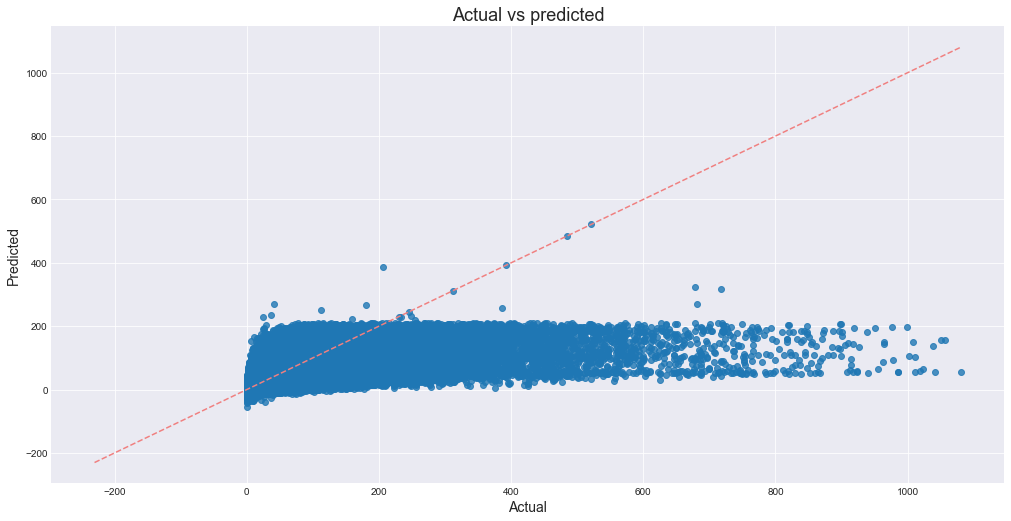

In [27]:
linear_assumption(lr, X, y)

We can see in this case that there is not a linear relationship. Our predictions are biased, and do not follow the diagonal line.

To solve this problem we need to:

Either adding polynomial terms to some of the predictors or applying nonlinear transformations. If those do not work, try adding additional variables to help capture the relationship between the predictors and the label.

## 2. Normality of the error terms

More specifically, this assumes that the error terms of the model are normally distributed.

Linear regressions other than Ordinary Least Squares (OLS) may also assume normality of the predictors or the label, but that is not the case here.

In [28]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(20, 10))
    plt.title('Distribution of residuals', fontsize = 18)
    ax = sns.distplot(df_results['Residuals'])
    
    # Set the fontsize for x axis and y axis. 
    ax.tick_params(axis = 'y', labelsize = 14)
    ax.tick_params(axis = 'x', labelsize = 14)
    
    plt.xlabel('Residuals', fontsize = 14)
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


/Users/miaaa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


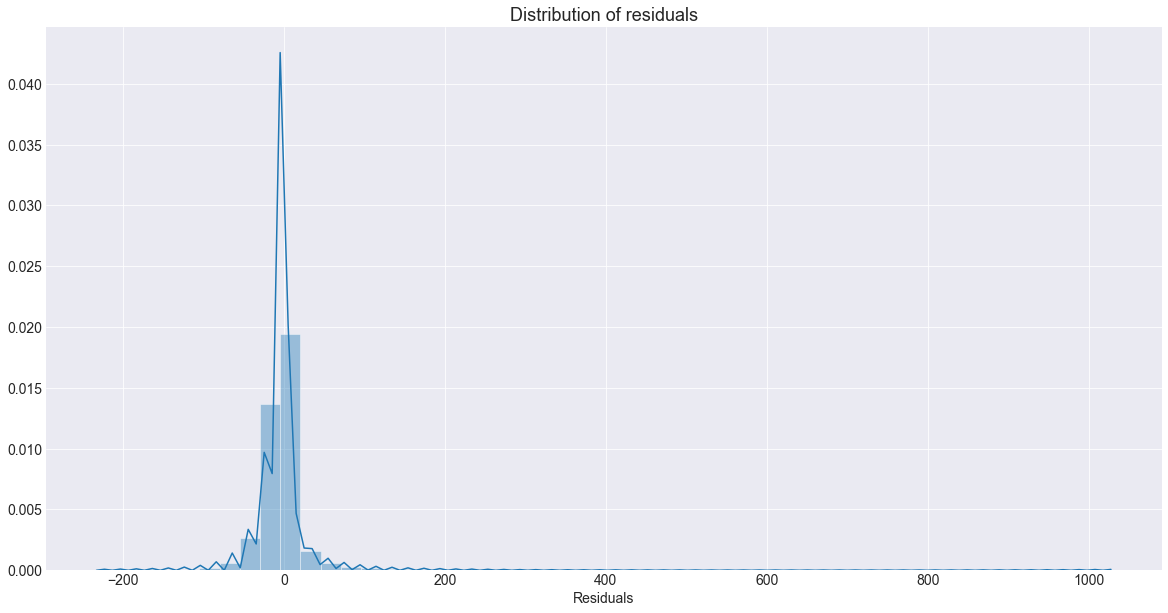


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [29]:
normal_errors_assumption(lr, X, y)

## 3. Homoscedasticity (equal variance) of residuals

In [30]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [31]:
autocorrelation_assumption(lr, X, y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9969871024731498
Little to no autocorrelation 

Assumption satisfied


## 4. Homoscedasticity

In [32]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize = (20, 10))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x = df_results.index, y = df_results.Residuals, alpha = 0.5)
    
    plt.plot(np.repeat(0, df_results.index.max()), color = 'lightcoral', linestyle='--')
    
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals', fontsize = 18)
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


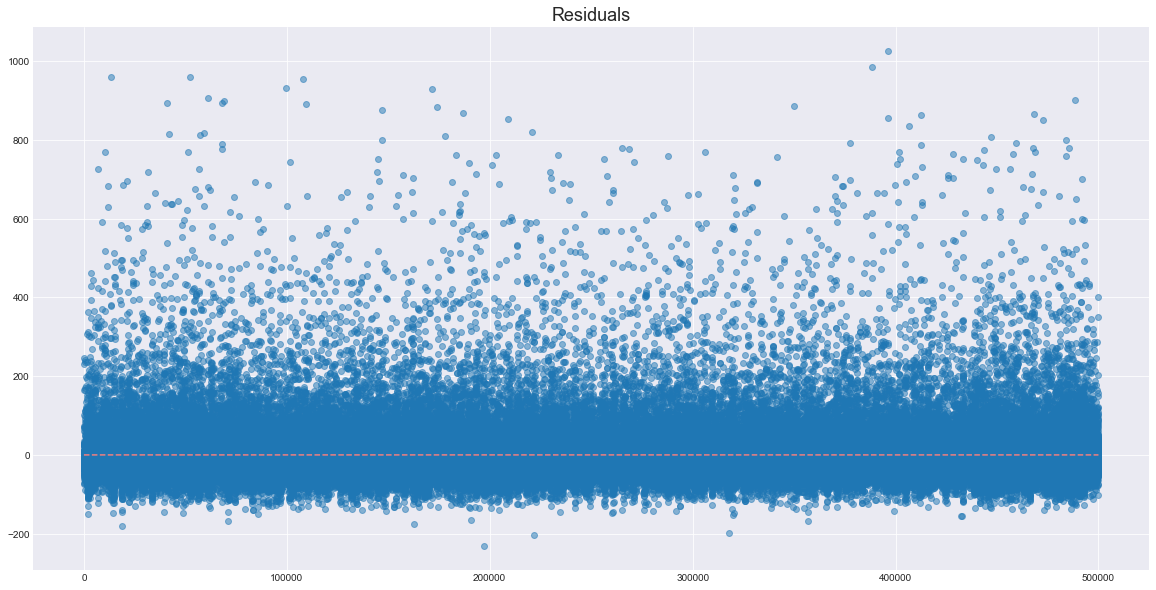

In [33]:
homoscedasticity_assumption(lr, X, y)

We can’t see a fully uniform variance across our residuals, so this is potentially problematic. 

However, we know from our other tests that our model has several issues and is under predicting in many cases.

# Part 5 - Linear regression model performance assessment

In [33]:
# Find the intercept (bias).
print('Intercept:', (lr.intercept_))

Intercept: -108224468531.81284


## Accuracy rate (R^2) on training dataset

In [34]:
# Make predictions using the training set.
y_pred_train = lr.predict(X_train)

# Performance Metric: Mean Squared Error.
print("Mean Squared Error (MSE):  %.2f" % mean_squared_error(y_train, y_pred_train))

# Explained variance score:
print('The coefficient of determination (R^2):  %.2f' % r2_score(y_train, y_pred_train))

Mean Squared Error (MSE):  1421.59
The coefficient of determination (R^2):  0.42


## Accuracy rate (R^2) on testing dataset

In [35]:
# Make predictions using the testing set.
y_pred_test = lr.predict(X_test)

# Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):  %.2f" % mean_squared_error(y_test, y_pred_test))

# Explained variance score:
print('The coefficient of determination (R^2):  %.2f' % r2_score(y_test, y_pred_test))

Mean Squared Error (MSE):  1461.81
The coefficient of determination (R^2):  0.41


In [36]:
# Print a few predictions
print((pd.DataFrame(y_pred_test, columns = {'y_prediction'}).head(5)))
print()

   y_prediction
0     21.284302
1     18.465561
2     25.107162
3     20.623718
4     -0.757095



The R squared values on training dataset is near testing dataset, indicats that the 
the overfitting issue does not matter here.

The R squared value on testing dataset is 0.41, which means 41% of the variability in y (activedays) can be explained by using X (the remaining independent variables I created). 

## Feature Importances

The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. 

In [37]:
# Print the model's coefficient value, and make a ranking dataframe.  
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient'] = pd.Series(abs(lr.coef_))
coeff_df_sort = coeff_df.sort_values(by = 'Coefficient', ascending = False).round(4).head(10)
coeff_df_sort

,Features,Coefficient
4,PERSIA_AND_MACEDON_is_null,1.803744e+10
5,VIKINGS_is_null,1.803744e+10
7,AUSTRALIA_is_null,1.803744e+10
0,POLAND_is_null,1.803744e+10
1,NUBIA_is_null,1.803743e+10
2,KHMER_AND_INDONESIA_is_null,1.803742e+10
39,Total_Expansion,9.018722e+09
38,Total_DLC,9.018722e+09
3,GATHERING_STORM_is_null,1.074084e+05
6,RISE_AND_FALL_is_null,3.066810e+04


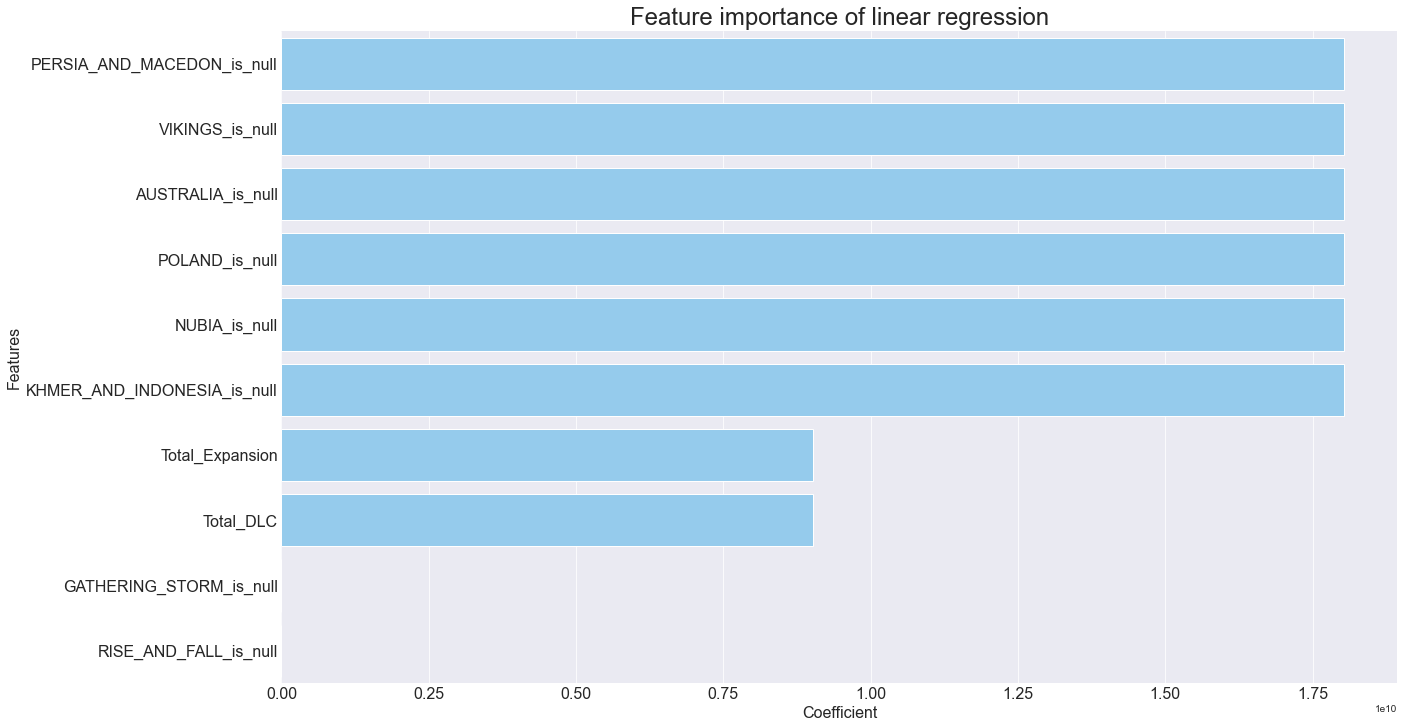

In [38]:
# Set figure size. 
rcParams['figure.figsize'] = (20, 12)

# Make barplot
ax = sns.barplot('Coefficient', 'Features', data = coeff_df_sort.sort_values(by = 'Coefficient', ascending = False), 
                 color = 'lightskyblue', orient = 'h')

# Set x_label, y_label, plot title name.  
ax.set_xlabel('Coefficient', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.set_title('Feature importance of linear regression', fontsize = 24)

# Set the fontsize for x axis and y axis. 
ax.tick_params(axis = 'y', labelsize = 16)
ax.tick_params(axis = 'x', labelsize = 16)

Since the coefficients are too high, the unit on the X axis (coefficient) is 1E10, so we can't see the coefficients of 'GATHERING_STORM_is_null' and 'RISE_AND_FALL_is_null'. 

However, they do have the coefficient values, which are 1.074084e+05 and 3.066810e+04 respectively, please refer to the above 'coeff_df_sort' dataframe. 

## Summary on the the causes for active days:

The top 10 reasons for active days are shown in above bar plot. 

Mainly is categorized as the players' install date of DLC and expansion packs, and wee see that conducting feature engineering is useful. 

- PERSIA_AND_MACEDON_is_null

- VIKINGS_is_null

- AUSTRALIA_is_null	

- POLAND_is_null

- NUBIA_is_null

- KHMER_AND_INDONESIA_is_null

- Total_Expansion

- Total_DLC

- GATHERING_STORM_is_null	

- RISE_AND_FALL_is_null	

## Find p-value (significance) in linear regression model

The p-values help determine whether the relationships that I observe in this CIV6 dataset also exist in the larger population of players sample. 

The p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. 

If there is no correlation, there is no association between the changes in the independent variable and the shifts in the dependent variable. 

In other words, there is insufficient evidence to conclude that there is effect at the whole players level.

In [41]:
X_constant = sm.add_constant(X.to_numpy())
sm_lin_reg = sm.OLS(y, X_constant).fit()
sm_lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ACTIVEDAYS   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     459.2
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:55:20   Log-Likelihood:            -2.5263e+06
No. Observations:              500000   AIC:                         5.054e+06
Df Residuals:                  499235   BIC:                         5.063e+06
Df Model:                         764                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.919e+04   1264.697     15.176      0.000    1.67e+04    2.17e+04
x1          1.949e+04   1301.152     14.982      0.000    1.69e+04     2.2e+04
x2          8896.4555   1364.860      6.518      0.000    6221.372    1.16e+04
x3          6963.6362   1361.641      5.114      0.000    4294.863    9632.409
x4         -9.427e+04   8264.638    -11.407      0.000    -1.1e+05   -7.81e+04
x5          2.284e+04   1271.345     17.965      0.000    2.03e+04    2.53e+04
x6          2.147e+04   1392.668     15.416      0.000    1.87e+04    2.42e+04
x7         -3.002e+04    537.871    -55.817      0.000   -3.11e+04    -2.9e+04
x8          2.164e+04   1387.284     15.598      0.000    1.89e+04    2.44e+04
x9            -4.0724      0.279    -14.620      0.000      -4.618      -3.526
x10           -9.3220      0.359    -25.977      0.000     -10.025      -8.619
x11          -10.2779      0.357    -28.750      0.000     -10.979      -9.577
x12          -46.6723      4.093    -11.402      0.000     -54.695     -38.649
x13           -2.4145      0.234    -10.303      0.000      -2.874      -1.955
x14           -3.0948      0.408     -7.592      0.000      -3.894      -2.296
x15          -14.8627      0.266    -55.779      0.000     -15.385     -14.340
x16           -3.0106      0.396     -7.606      0.000      -3.786      -2.235
x17          545.4674     25.360     21.509      0.000     495.764     595.171
x18         -543.6230     25.360    -21.436      0.000    -593.327    -493.919
x19            0.0386      0.070      0.555      0.579      -0.098       0.175
x20           -0.5305      0.096     -5.527      0.000      -0.719      -0.342
x21           -0.9050      0.094     -9.579      0.000      -1.090      -0.720
x22           -4.6843      0.063    -74.717      0.000      -4.807      -4.561
x23            0.0038      0.061      0.062      0.951      -0.115       0.123
x24            0.0048      0.096      0.051      0.960      -0.182       0.192
x25           -1.7656      0.037    -48.125      0.000      -1.837      -1.694
x26           -0.1907      0.094     -2.023      0.043      -0.375      -0.006
x27           44.9858      2.111     21.307      0.000      40.848      49.124
x28          -43.7075      2.114    -20.678      0.000     -47.850     -39.565
x29           -0.0288      0.027     -1.052      0.293      -0.083       0.025
x30            0.0501      0.035      1.451      0.147      -0.018       0.118
x31           -0.0430      0.036     -1.208      0.227      -0.113       0.027
x32           -0.1379      0.020     -6.828      0.000      -0.177      -0.098
x33           -0.0257      0.024     -1.095      0.274      -0.072       0.020
x34            0.0093      0.038      0.241      0.809      -0.066       0.085
x35           -0.0845      0.014     -5.884      0.000      -0.113      -0.056
x3

Since the feature name is missing, I cannot understand which features are significant.
So, I will add the feature name into above linear regression summary result. 

In [66]:
# Convert above summary result to dataframe. 
results_summary = sm_lin_reg.summary()

# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
result_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
result_df

,coef,std err,t,P>|t|,[0.025,0.975]
const,19190.0000,1264.697,15.176,0.000,16700.000,21700.000
x1,19490.0000,1301.152,14.982,0.000,16900.000,22000.000
x2,8896.4555,1364.860,6.518,0.000,6221.372,11600.000
x3,6963.6362,1361.641,5.114,0.000,4294.863,9632.409
x4,-94270.0000,8264.638,-11.407,0.000,-110000.000,-78100.000
...,...,...,...,...,...,...
x1240,9.4865,19.063,0.498,0.619,-27.876,46.849
x1241,37.8866,19.063,1.987,0.047,0.523,75.250
x1242,105.0632,12.059,8.713,0.000,81.429,128.698
x1243,37.4864,19.063,1.966,0.049,0.123,74.850


In [79]:
columns = X.columns
columns = columns.insert(loc = 0, item = 'const')
result_df = result_df.set_index(columns)
result_df

,coef,std err,t,P>|t|,[0.025,0.975]
const,19190.0000,1264.697,15.176,0.000,16700.000,21700.000
POLAND_is_null,19490.0000,1301.152,14.982,0.000,16900.000,22000.000
NUBIA_is_null,8896.4555,1364.860,6.518,0.000,6221.372,11600.000
KHMER_AND_INDONESIA_is_null,6963.6362,1361.641,5.114,0.000,4294.863,9632.409
GATHERING_STORM_is_null,-94270.0000,8264.638,-11.407,0.000,-110000.000,-78100.000
...,...,...,...,...,...,...
CIVILIZATIONMOSTSELECTED_CIVILIZATION_okina,9.4865,19.063,0.498,0.619,-27.876,46.849
CIVILIZATIONMOSTSELECTED_CIVILIZATION_reimu,37.8866,19.063,1.987,0.047,0.523,75.250
CIVILIZATIONMOSTSELECTED_CIVILIZATION_remilia,105.0632,12.059,8.713,0.000,81.429,128.698
CIVILIZATIONMOSTSELECTED_CIVILIZATION_yuduki,37.4864,19.063,1.966,0.049,0.123,74.850


## Independent variables that are significant (p value < 0.05)

A low p-value (< 0.05) indicates that I can reject the null hypothesis. 

Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

In other words, the predictors that have low p-values are likely to be a meaningful addition to my linear regression model, because changes in the predictor's value are related to changes in the response variable.

Thus, I will print out the predictors which p values are lower than 0.05, and see which features are significant. 

In [81]:
# Filter the p values < 0.05.
result_df.loc[(result_df['P>|t|'] < 0.05)]

,coef,std err,t,P>|t|,[0.025,0.975]
const,19190.0000,1264.697,15.176,0.000,16700.000,21700.000
POLAND_is_null,19490.0000,1301.152,14.982,0.000,16900.000,22000.000
NUBIA_is_null,8896.4555,1364.860,6.518,0.000,6221.372,11600.000
KHMER_AND_INDONESIA_is_null,6963.6362,1361.641,5.114,0.000,4294.863,9632.409
GATHERING_STORM_is_null,-94270.0000,8264.638,-11.407,0.000,-110000.000,-78100.000
...,...,...,...,...,...,...
CIVILIZATIONMOSTSELECTED_CIVILIZATION_ZULU,33.8107,2.531,13.358,0.000,28.850,38.771
CIVILIZATIONMOSTSELECTED_CIVILIZATION_reimu,37.8866,19.063,1.987,0.047,0.523,75.250
CIVILIZATIONMOSTSELECTED_CIVILIZATION_remilia,105.0632,12.059,8.713,0.000,81.429,128.698
CIVILIZATIONMOSTSELECTED_CIVILIZATION_yuduki,37.4864,19.063,1.966,0.049,0.123,74.850


# Part 6 - Regularization methods

Since the coeffcients of most important features in Linear Regression model are very big, I want to apply the Ridge and Lasso reguralization methods to see whether I can lower the values of coefficients.

In [42]:
# When initualize the Ridge model, we have to standardize the variables to make sure they are in the same scale. 
ridge = Ridge(alpha = 0.06, normalize = True)
ridge.fit(X_train, y_train)

Ridge(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [43]:
# Print score & MSE.
print('The coefficient of determination (R^2): ', ridge.score(X_test, y_test).round(4))
print('MSE: ', mean_squared_error(y_test, ridge.predict(X_test)).round(4))

The coefficient of determination (R^2):  0.3937
MSE:  1490.1657


After regularization, the R^2 score doesen't make any difference from the Linear Regression, the R squared value is around 39% on the testing dataset.

In [44]:
# Print the weight of each feature. 
ridge_coeff_df = pd.DataFrame(X_train.columns)
ridge_coeff_df.columns = ['Features']
ridge_coeff_df['Coefficient'] = pd.Series(ridge.coef_)

ridge_coeff_df_sort = ridge_coeff_df.sort_values(by = 'Coefficient', ascending = False).round(4).head(10)
ridge_coeff_df_sort

,Features,Coefficient
750,LEADERMOSTSELECTED_LEADER_sakuya,226.0779
1176,CIVILIZATIONMOSTSELECTED_CIVILIZATION_TERRA,207.2052
729,LEADERMOSTSELECTED_LEADER_YRGOS,207.2052
739,LEADERMOSTSELECTED_LEADER_ZOB_CHARLES_XI,192.0190
1236,CIVILIZATIONMOSTSELECTED_CIVILIZATION_ZOB_CIV_...,192.0190
555,LEADERMOSTSELECTED_LEADER_POLAND,188.1894
365,LEADERMOSTSELECTED_LEADER_JFD_ATHELSTAN,139.5628
373,LEADERMOSTSELECTED_LEADER_JFD_ELISABETH,136.4303
767,CIVILIZATIONMOSTSELECTED_CIVILIZATION_AR_PRUSSIA,108.7497
72,LEADERMOSTSELECTED_LEADER_AR_FREDERICK,108.7497


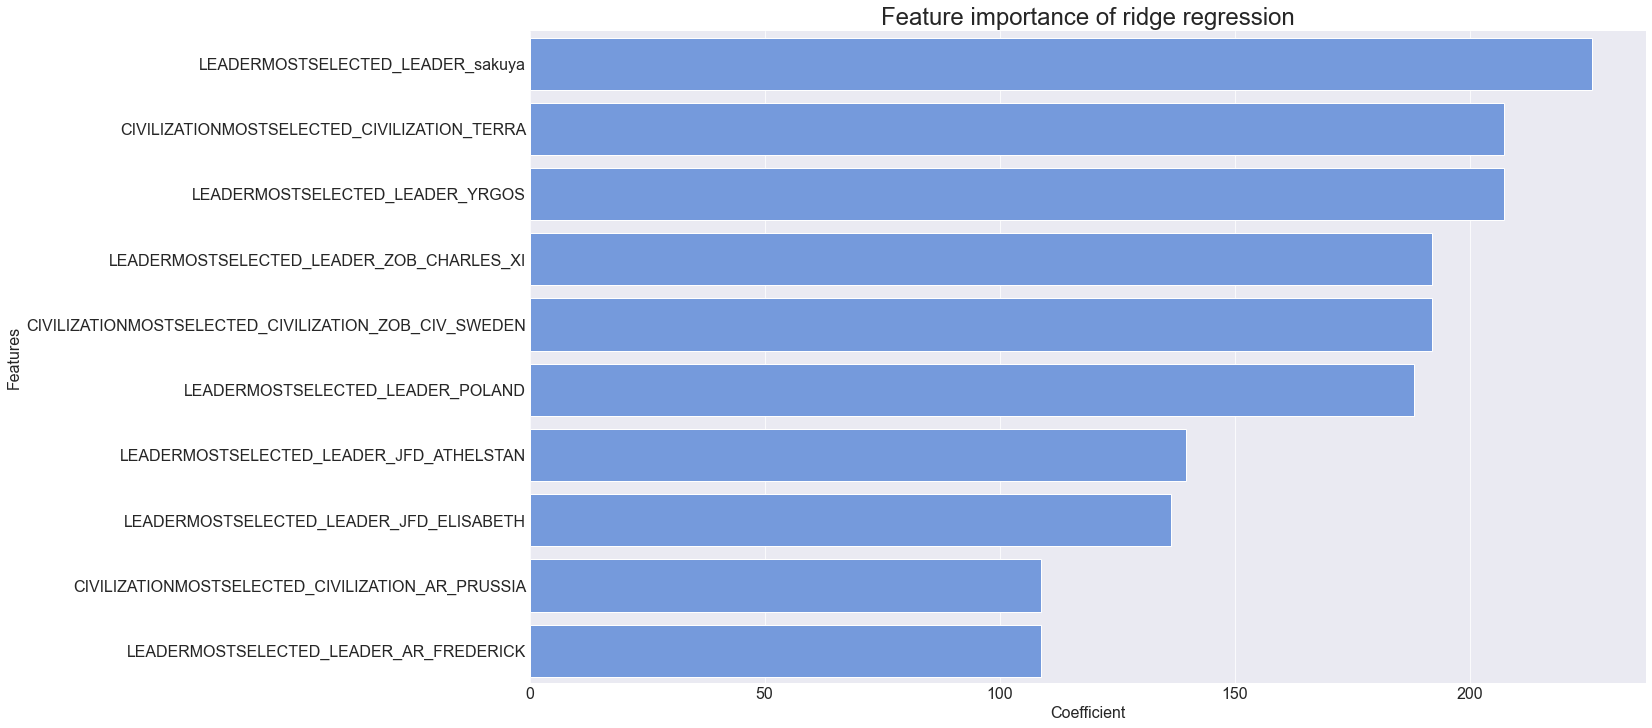

In [45]:
# Set figure size. 
rcParams['figure.figsize'] = (20, 12)

# Make barplot
ax = sns.barplot('Coefficient', 'Features', data = ridge_coeff_df_sort.sort_values(by = 'Coefficient', ascending = False), 
                 color = 'cornflowerblue', orient = 'h')

# Set x_label, y_label, plot title name.  
ax.set_xlabel('Coefficient', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.set_title('Feature importance of ridge regression', fontsize = 24)

# Set the fontsize for x axis and y axis. 
ax.tick_params(axis = 'y', labelsize = 16)
ax.tick_params(axis = 'x', labelsize = 16)

From above barplot, we can see the coefficients have been shrunk to lower values in ridge reguralization.

However, the top 10 important features that Ridge model analyzed have been changed to some of the leader in the variable of LEADERMOSTSELECTED, and some of civilization in the variable of CIVILIZATIONMOSTSELECTED. 

# Part 7 - Conclusion 

## Q1. Select your features and prepare your data for modeling


To improve the performance of linear regression model, I constructed the feature engineering to extract features from raw data, and generated 1244 features.

The main works I did are below. (Part 3 - Feature engineering cntains the details)

- Created additional binary columns to encode the presence of a NaT value in the expansion packs and DLC columns (e.g, POLAND, NUBIA, KHMER_AND_INDONESIA, GATHERING_STORM, 
PERSIA_AND_MACEDON, VIKINGS, RISE_AND_FALL, AUSTRALIA).

- Extracted the year, month, day from the datetime64 columns.

- Made features of number of DLCs or expansion packs owned, which are 'Total_DLC' and 'Total_Expansion'.

- Created a feature to find the days from most recent DLC install, which is 'daysFromDLCInstall'.

- Converted the categorical variables (LEADERMOSTSELECTED and CIVILIZATIONMOSTSELECTED) into dummy variables.

- Dropped the 'PLAYERID' variable, as it does not germane to the analysis.

## Q2. Explain your DV and IVs clearly

Part 4 - Set up the dependent variable and the independent variable cntains the details.

- Dependent variable: ACTIVEDAYS
- Independent variables: The remaining 1244 variables, exclude the ACTIVEDAYS one.

## Q3. Check for linear regression assumptions

Please refer to the part 4 - check for linear regression assumptions.

From part 4, we can clearly see that a linear regression model on this CIV6 dataset violates a number of assumptions which cause significant problems with the interpretation of the model itself. 

It’s not uncommon for assumptions to be violated on real-world data, but it’s important to check them so we can either fix them and/or be aware of the flaws in the model for the presentation of the results or the decision making process.

It is dangerous to make decisions on a model that has violated assumptions because those decisions are effectively being formulated on made-up numbers. Not only that, but it also provides a false sense of security due to trying to be empirical in the decision making process. Empiricism requires due diligence, which is why these assumptions exist and are stated up front. 



## Q4. Run a multiple regression model and explain:

## a. Is your model is significant or not. why?

The r squared score of Linear Regression model is only 0.413, suggests my model is not significant. 

In addition, from the part 4, we see that the residual and fitted line plot shows that the the regression line systematically over and under-predicts the data (bias) at different points along the curve. This indicates a bad fit.

## b. Which of your IVs are significant and why?

Please refer to part 6's section "independent variables that are significant (p value < 0.05)". 

We see there are 736 predictors(IV) p-values lower than 0.05, which are statistically significant. 

On the other hand, there are 508 predictors(IV) that p-values are greater than the usual significance level of 0.05, which are not statistically significant.

Keeping variables that are not statistically significant can reduce the model’s precision.

The reason why p-values lower than 0.05 are significant is because that the p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). 

A low p-value (< 0.05) indicates that I can reject the null hypothesis. 

Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

In other words, the predictors that have low p-values are likely to be a meaningful addition to my linear regression model, because changes in the predictor's value are related to changes in the response variable.

## c. What about your coefficients? Interprete at least 2 of your coefficients.

I have inteepreted this answer in part 5's section - feature importances.

I have printed 10 highest coefficients (weights) variables in the Linear Regression model, and I visualized that 10 variables as well.

However, the values of coefficients in Linear Regression are too big, the highest 10 coefficients are even 1E10 (1 times 10 raised to the 10th power). 

Thus, to lower the coefficient values, I applied the reguralization method of Ridge Regression model. 

Please refer to part 6 - reguralization methods, after applying the Ridge Regression, the coefficients have been shrunk to lower values, and I have visualized the top 10 highest 10 coefficients. 

## d. What is your R square? Is it good or bad?

The R squared value on testing dataset is 0.41, which means 41% of the variability in y (activedays) can be explained by using X (the remaining 1244 independent variables).

The mean square error is 1461.81, which is big as well. 

Thus, this R square value is bad, as a low R-squared is most problematic when you want to produce predictions that are reasonably precise (have a small enough prediction interval). 

We should use nonlinear regression because linear models are unable to fit the specific curve that these data follow.